# How is the GINI Coefficient of super powers been in the 21st century?

### The dataset contains the gini coefficient of all the countries. A higher GINI coefficient would signify more ineqality among its population


#### How to download the dataset: Head to this page: https://data.worldbank.org/indicator/SI.POV.GINI, the download csv section would be on the right hand side.


### 1. Did the income inequality decrease during the 2008 finiancial crisis? And in the western countries, whose GINI coeffienct reduced sharply.


### 2. Which South East Asian country has the lowest income inequality(Low Gini Coefficient)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
gini = pd.read_csv("gini_data.csv",skiprows=3)

In [4]:
gini.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,84.000000,76.000000,83.000000,82.000000,81.000000,72.000000,64.000000,22.000000,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,...,36.327381,36.418421,36.554217,36.789024,36.228395,35.947222,35.546875,40.972727,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.269831,7.276697,7.990700,7.860874,7.489663,7.399371,7.487386,8.046897,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,...,24.700000,24.600000,24.000000,25.400000,24.800000,24.200000,24.600000,25.300000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,...,30.275000,30.775000,31.050000,31.725000,31.200000,30.225000,29.675000,36.475000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,...,35.500000,36.200000,35.100000,35.750000,35.000000,35.350000,34.900000,41.750000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,...,41.125000,40.550000,40.850000,41.175000,41.100000,40.875000,41.325000,47.575000,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN,33.7,...,53.500000,52.800000,63.000000,59.100000,54.600000,56.300000,53.900000,53.400000,NaN,NaN


In [5]:
row0 = gini.iloc[0]
row0

Country Name                                 Aruba
Country Code                                   ABW
Indicator Name    Gini index (World Bank estimate)
Indicator Code                         SI.POV.GINI
1960                                           NaN
                                ...               
2017                                           NaN
2018                                           NaN
2019                                           NaN
2020                                           NaN
Unnamed: 65                                    NaN
Name: 0, Length: 66, dtype: object

In [75]:
display(gini[gini['Country Name']=='South Africa'])
gini['Country Name'].unique()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
263,South Africa,ZAF,Gini index (World Bank estimate),SI.POV.GINI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica',
       'Denmark', 'Dominican Republic', 'Alge

In [9]:
for key in gini.columns:
    print(key,row0[key])

Country Name Aruba
Country Code ABW
Indicator Name Gini index (World Bank estimate)
Indicator Code SI.POV.GINI
1960 nan
1961 nan
1962 nan
1963 nan
1964 nan
1965 nan
1966 nan
1967 nan
1968 nan
1969 nan
1970 nan
1971 nan
1972 nan
1973 nan
1974 nan
1975 nan
1976 nan
1977 nan
1978 nan
1979 nan
1980 nan
1981 nan
1982 nan
1983 nan
1984 nan
1985 nan
1986 nan
1987 nan
1988 nan
1989 nan
1990 nan
1991 nan
1992 nan
1993 nan
1994 nan
1995 nan
1996 nan
1997 nan
1998 nan
1999 nan
2000 nan
2001 nan
2002 nan
2003 nan
2004 nan
2005 nan
2006 nan
2007 nan
2008 nan
2009 nan
2010 nan
2011 nan
2012 nan
2013 nan
2014 nan
2015 nan
2016 nan
2017 nan
2018 nan
2019 nan
2020 nan
Unnamed: 65 nan


In [70]:
ukdf = gini[gini['Country Code']=='GBR']
usadf = gini[gini['Country Code']=='USA']
russiadf = gini[gini['Country Code']=='RUS']
germanydf = gini[gini['Country Code']=='DEU']
francedf =  gini[gini['Country Code']=='FRA']

singaporedf =  gini[gini['Country Code']=='SGP']
thailanddf =  gini[gini['Country Code']=='THA']
malaysiadf =  gini[gini['Country Code']=='MYS']
vietnamdf =  gini[gini['Country Code']=='VNM']
indodf =  gini[gini['Country Code']=='IDN']




In [45]:
germanydf.iloc[0]['1990':'2020']

1990     NaN
1991    29.2
1992     NaN
1993     NaN
1994    29.2
1995    28.9
1996     NaN
1997     NaN
1998    28.3
1999     NaN
2000    28.8
2001    30.3
2002    29.9
2003    30.0
2004    30.4
2005    32.1
2006    31.3
2007    31.3
2008    31.1
2009    30.5
2010    30.2
2011    30.5
2012    30.9
2013    31.1
2014    30.9
2015    31.7
2016    31.9
2017     NaN
2018     NaN
2019     NaN
2020     NaN
Name: 55, dtype: object

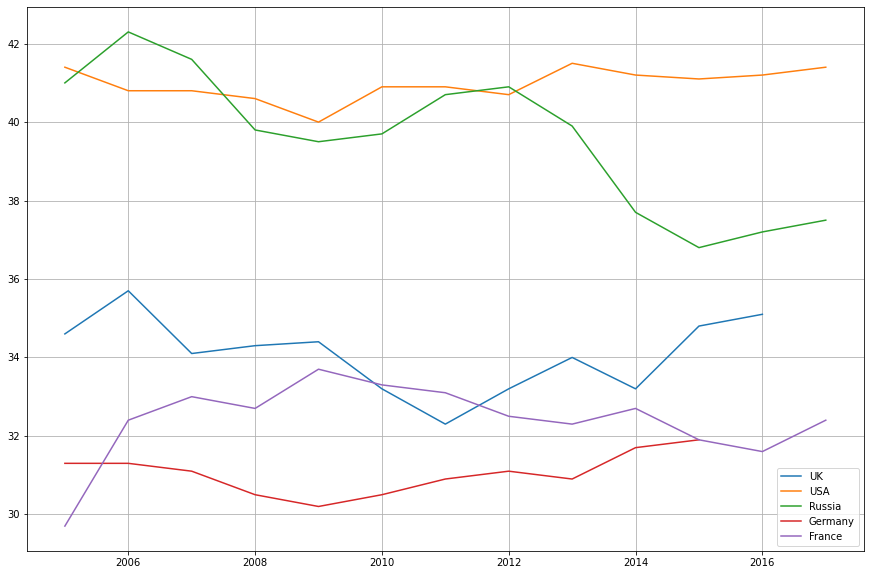

In [61]:
def plot_indicator(df,label):
    plt.plot(range(2005,2020),df.iloc[0]['2006':'2020'],label=label)
plt.figure(figsize=(15,10))
plot_indicator(ukdf,'UK')
plot_indicator(usadf,'USA')
plot_indicator(russiadf,'Russia')
plot_indicator(germanydf,'Germany')
plot_indicator(francedf,'France')
plt.legend()
plt.grid()
    

### Most countries income inequality imrpoved during the 2008 financial crisis except for France, which saw an increase in income inequality during that period. 

### Although the other countries faced a dip in the Gini Coefficient, they soon bounced back up in about 3-4 years. 

### Russia is also seeing a huge decrease in it's Gini Coefficient since 2012. With the nation of many oligarchs, its interesting to see that the inequality is being reduced. This might be due to a rising middle income population. 

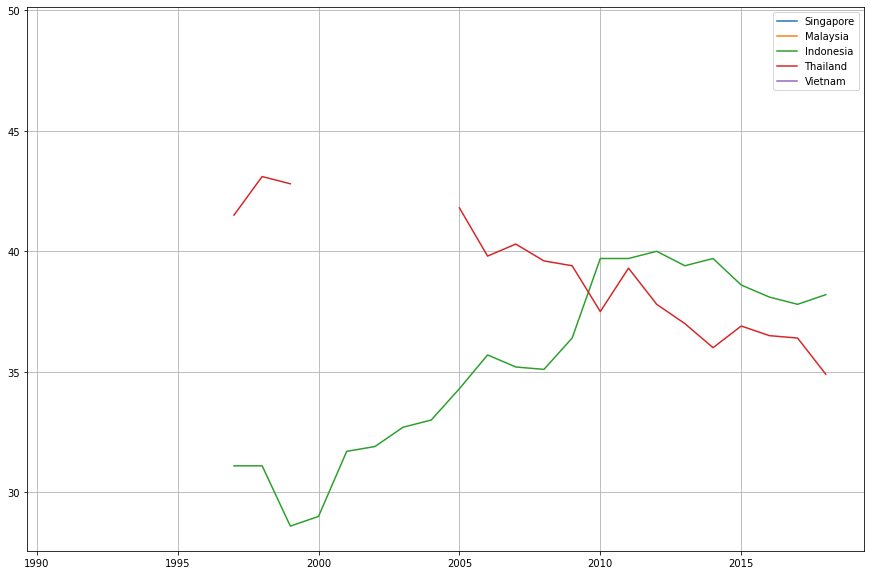

In [72]:
def plot_indicator(df,label):
    plt.plot(range(1990,2020),df.iloc[0]['1991':'2020'],label=label)
plt.figure(figsize=(15,10))
plot_indicator(singaporedf,'Singapore')
plot_indicator(malaysiadf,'Malaysia')
plot_indicator(indodf,'Indonesia')
plot_indicator(thailanddf,'Thailand')
plot_indicator(vietnamdf,'Vietnam')
plt.legend()
plt.grid()
    